# Elbow Method

In [1]:
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

# create an artificial dataset, each with 2 attributes
cluster1 = [np.random.normal(1, 1, 10), np.random.normal(5, 1, 10)]
cluster2 = [np.random.normal(5, 1, 10), np.random.normal(2, 1, 10)]
cluster3 = [np.random.normal(10, 1, 10), np.random.normal(-2, 1, 10)]
cluster4 = [np.random.normal(-4, 1, 10), np.random.normal(15, 1, 10)]
X = np.hstack((cluster1, cluster2, cluster3, cluster4)).T

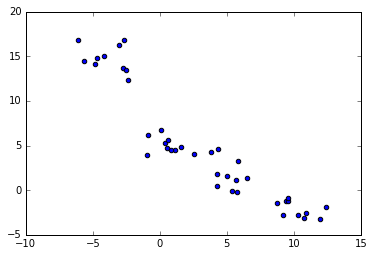

In [2]:
# This is how the datapoints look like
plt.scatter(X[:,0], X[:,1])

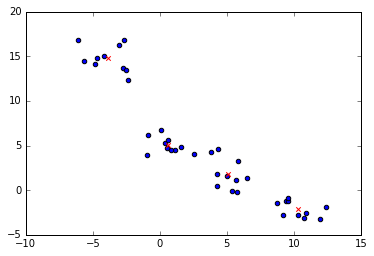

In [3]:
# run a K-means clustering
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
plt.scatter(X[:,0], X[:,1])
# plot the centre of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color ='r', marker='x')

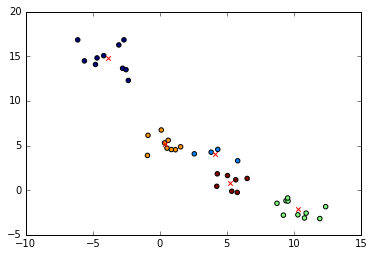

In [4]:
# run a K-means clustering
k = 5
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y = kmeans.predict(X)
# pain the point in different color based on which cluster they belong to 
plt.scatter(X[:,0], X[:,1], c = y)
# plot the centre of each cluster
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            color ='r', marker='x')

In [5]:
def meanDistortion(X, c):
    '''
    return the average distance of each datapoint to its nearest cluster's center
    '''
    cd = cdist(X, c, 'euclidean')
    return np.sum(np.min(cd, axis=1)) / X.shape[0]

meanDistortion(X, kmeans.cluster_centers_)

1.2961342863870473

In [6]:
# run K-means multiple times, each with different K
# store the mean distortion at each iteration
K = range(1, 30)
meandistortions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(meanDistortion(X, kmeans.cluster_centers_))

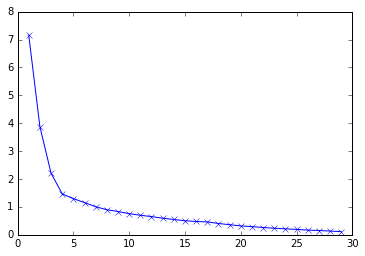

In [7]:
# plot out the mean distortion for each K
plt.plot(K, meandistortions, 'bx-')

# can you see an elbow there?

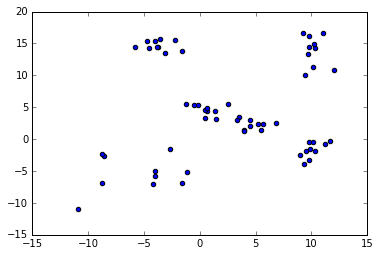

In [8]:
# Excercise 1
# Change the dataset to include more datapoints, and repeat the experiment,
# check how the location of the elbow.
# e.g.
cluster1 = [np.random.normal(1, 1, 10), np.random.normal(5, 1, 10)]
cluster2 = [np.random.normal(5, 1, 10), np.random.normal(2, 1, 10)]
cluster3 = [np.random.normal(10, 1, 10), np.random.normal(-2, 1, 10)]
cluster4 = [np.random.normal(-4, 1, 10), np.random.normal(15, 1, 10)]
cluster5 = [np.random.normal(10, 1, 10), np.random.normal(14, 2, 10)]
cluster6 = [np.random.normal(-5, 3, 10), np.random.normal(-5, 2, 10)]
X = np.hstack((cluster1, cluster2, cluster3, cluster4, cluster5, cluster6)).T
plt.scatter(X[:,0], X[:,1])

In [9]:
# Excercise 2
# Change the dataset to iris dataset,
# check how the location of the elbow.
# e.g.
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data

In [10]:
# Excercise 3
# Change the dataset to digits dataset,
# check how the location of the elbow.
# e.g.
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data